In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#FN_INPUT = '/Users/sheilaiyer/resources/biastools_project/single.end.bt.bias'
#FN_INPUT = '/Users/sheilaiyer/resources/biastools_project/deeper_bt_bias.txt'
#FN_INPUT = '/Users/sheilaiyer/resources/biastools_project/final.realigned.bt.bias'#test.final.realigned.bt.bias
FN_INPUT = '/Users/sheilaiyer/resources/biastools_project/low.mapq.final.realigned.bt.bias'

df = pd.read_csv(FN_INPUT, sep='\t')
df_merged_final = df[(df['NUM_READS']) >= 15]

0.01    0.408835
0.10    0.450704
0.25    0.474820
0.50    0.500000
0.75    0.527778
0.90    0.554760
0.99    1.000000
Name: REFERENCE_BIAS, dtype: float64
mean:  0.5092646812132176


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Counts')

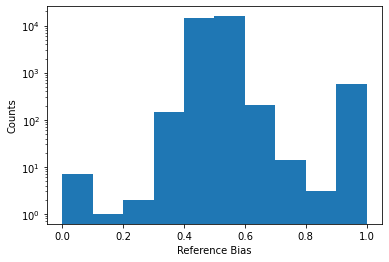

In [2]:
import numpy as np

rb = df_merged_final['REFERENCE_BIAS']
if 'NaN' in rb:
    print("true")

#: show stats
print (rb.quantile(q=[.01, .1, 0.25,0.5,0.75, .90, .99]))
print("mean: ", np.mean(rb))

plt.clf()
plt.hist(rb)
plt.yscale('log')
plt.xlabel('Reference Bias')
plt.ylabel('Counts')

In [3]:
df_eighty = df_merged_final[df_merged_final['REFERENCE_BIAS'] >= 0.80]
df_eighty_refbi = df_eighty['REFERENCE_BIAS']
df_eighty.count()



CHR                  565
HET_SITE             565
REFERENCE_BIAS       565
REF_COUNT            565
ALT_COUNT            565
GAP_COUNT            565
OTHER_COUNT          565
NUM_READS            565
SUM_MAPQ             565
READ_DISTRIBUTION    565
HAP_A_COUNT          565
HAP_B_COUNT          565
REF_HAP_COUNT        565
ALT_HAP_COUNT        565
FRAC_LOW_MAPQ        565
dtype: int64

In [4]:
def map_mapq_to_color(mapq):
    if mapq >= 40:
        return 0
    elif mapq >= 30:
        return 1
    elif mapq >= 20:
        return 2
    elif mapq >= 10:
        return 3
    elif mapq >= 5:
        return 4
    elif mapq >= 3:
        return 5
    elif mapq >= 1:
        return 6
    return 7

<ipython-input-5-76b016f47266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eighty['AVERAGE_MAPQ'] = df_eighty['SUM_MAPQ']/(df_eighty['NUM_READS'])


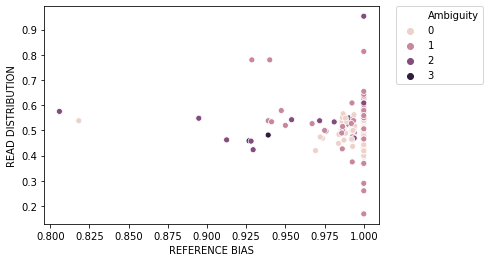

In [5]:
sp = pd.DataFrame()

# Add columns
df_eighty['AVERAGE_MAPQ'] = df_eighty['SUM_MAPQ']/(df_eighty['NUM_READS'])
mapQ = list(df_eighty['AVERAGE_MAPQ'])

sp['REFERENCE BIAS'] = list(df_eighty_refbi)
sp['HET_SITE'] = list(df_eighty['HET_SITE'])
sp['READ DISTRIBUTION'] = list(df_eighty['READ_DISTRIBUTION'])
sp.head()

mapped_mapQ = [map_mapq_to_color(q) for q in mapQ]
sp['Ambiguity'] = mapped_mapQ
sp['MapQ'] = list(mapQ)
sp['FRAC_LOW_MAPQ'] = list(df_eighty['FRAC_LOW_MAPQ'])

ax = sns.scatterplot(x="REFERENCE BIAS", y="READ DISTRIBUTION",  hue = "Ambiguity", data = sp)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

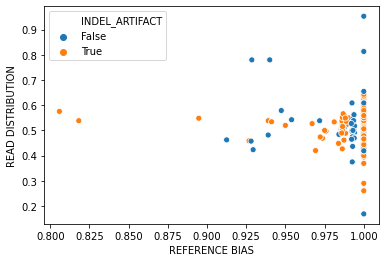

In [6]:
sp['INDEL_ARTIFACT']= list(df_eighty['REF_COUNT']/(df_eighty['REF_COUNT']+df_eighty['ALT_COUNT']+df_eighty['GAP_COUNT'])<0.80)
ax = sns.scatterplot(x="REFERENCE BIAS", y="READ DISTRIBUTION",  hue = "INDEL_ARTIFACT", data = sp)#hue="size", size="size", data=tips)

In [7]:
print(len(list(df_eighty_refbi)))

565


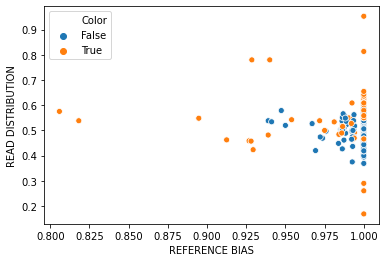

In [8]:
sp['Color'] = sp['FRAC_LOW_MAPQ']>0
ax = sns.scatterplot(x="REFERENCE BIAS", y="READ DISTRIBUTION",  hue = "Color", data = sp)#hue="size", size="size", data=tips)

<ipython-input-9-d7569449f904>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eighty_new_bottom['AVERAGE_MAPQ'] = df_eighty_new_bottom['SUM_MAPQ']/(df_eighty_new_bottom['NUM_READS'])


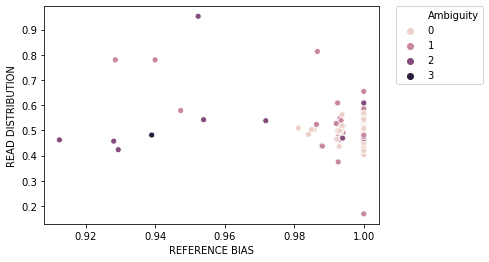

In [9]:
sp2 = pd.DataFrame()

#df_eighty = df_merged_final[df_merged_final['REFERENCE_BIAS'] >= 0.80]
df_eighty_new_bottom = df_eighty[df_eighty['REF_COUNT']/(df_eighty['REF_COUNT']+df_eighty['ALT_COUNT']+df_eighty['GAP_COUNT'])>=0.80]
df_eighty_new_top = df_eighty[(df_eighty['REF_COUNT']+df_eighty['GAP_COUNT'])/(df_eighty['REF_COUNT']+df_eighty['ALT_COUNT']+df_eighty['GAP_COUNT'])>=0.80]
df_eighty_new_bottom.count()#this equals to 237
df_eighty_new_top.count()#this equals to 565, which means that it doesn't filter

# Add columns
df_eighty_new_bottom['AVERAGE_MAPQ'] = df_eighty_new_bottom['SUM_MAPQ']/(df_eighty_new_bottom['NUM_READS'])
mapQ2 = list(df_eighty_new_bottom['AVERAGE_MAPQ'])

sp2['REFERENCE BIAS'] = list(df_eighty_new_bottom['REF_COUNT']/(df_eighty_new_bottom['REF_COUNT']+df_eighty_new_bottom['ALT_COUNT']+df_eighty_new_bottom['GAP_COUNT']))
sp2['HET_SITE'] = list(df_eighty_new_bottom['HET_SITE'])
sp2['READ DISTRIBUTION'] = list(df_eighty_new_bottom['READ_DISTRIBUTION'])
sp2['FRAC_LOW_MAPQ'] = list(df_eighty_new_bottom['FRAC_LOW_MAPQ'])

sp2.head()

mapped_mapQ2 = [map_mapq_to_color(q) for q in mapQ2]
sp2['Ambiguity'] = mapped_mapQ2
sp2['MapQ'] = list(mapQ2)

ax = sns.scatterplot(x="REFERENCE BIAS", y="READ DISTRIBUTION",  hue = "Ambiguity", data = sp2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
print(len(list(sp2['REFERENCE BIAS'])))
#sp2.to_csv('remove_indel_artifact_bias.csv', index=False)
sp2

237


,REFERENCE BIAS,HET_SITE,READ DISTRIBUTION,FRAC_LOW_MAPQ,Ambiguity,MapQ
0,1.000000,7947693,0.588235,0.257353,2,29.147059
1,0.928571,7947814,0.780000,0.120000,1,35.220000
2,0.940000,7947815,0.780000,0.120000,1,35.220000
3,1.000000,7947926,0.448276,0.310345,2,24.724138
4,1.000000,9666881,0.468531,0.000000,0,41.986014
...,...,...,...,...,...,...
232,1.000000,46135325,0.609023,0.218045,2,24.609023
233,1.000000,46242999,0.506579,0.000000,0,41.881579
234,1.000000,46464842,0.511278,0.000000,0,41.669173
235,1.000000,46464843,0.507576,0.000000,0,41.666667


In [11]:
FN_INPUT2 = '/Users/sheilaiyer/resources/biastools_project/deeper_bt_bias.txt'
df2 = pd.read_csv(FN_INPUT2, sep='\t')
df2

,CHR,HET_SITE,REFERENCE_BIAS,REF_COUNT,ALT_COUNT,GAP_COUNT,OTHER_COUNT,NUM_READS,SUM_MAPQ,READ_DISTRIBUTION
0,chr21,5063904,0.475904,79,87,0,0,166,2139,0.481928
1,chr21,5063917,0.480769,75,81,0,1,157,2107,0.477707
2,chr21,5216337,0.511364,45,43,0,0,88,3696,0.511364
3,chr21,5218151,0.503145,80,79,0,1,160,6720,0.500000
4,chr21,5218669,0.506579,77,75,0,0,152,6384,0.506579
...,...,...,...,...,...,...,...,...,...,...
31408,chr21,46670717,0.496732,76,77,0,0,153,6422,0.496732
31409,chr21,46672824,0.500000,78,78,0,1,157,6592,0.496815
31410,chr21,46674891,0.482759,70,75,0,0,145,6090,0.482759
31411,chr21,46677189,0.500000,70,70,0,0,140,4229,0.500000


In [12]:
count = 0
ntb_filtered_het_site_list = list(sp2['HET_SITE'])
hets = list(df2['HET_SITE'])
ref_bi = list(df2['REFERENCE_BIAS'])
for i in range(len(ntb_filtered_het_site_list)):
    site = ntb_filtered_het_site_list[i]
    pos = hets.index(site);
    #print("hets[pos]: ", hets[pos], " and is supposed to match site = ", site)
    #print("ref_bi[pos]: ", ref_bi[pos])
    if ref_bi[pos] < 0.8:#before indel realignment was good
        count += 1
        print("dropping: ", site)
        sp2 = sp2.drop(labels = i, axis = 0)
print("count: ", count)

dropping:  9666881
dropping:  9666882
dropping:  10052292
dropping:  10397566
dropping:  10716219
dropping:  10719747
dropping:  10719752
dropping:  10731255
dropping:  14047138
dropping:  14077260
dropping:  14077264
dropping:  14077268
dropping:  14233702
dropping:  14323277
dropping:  14487347
dropping:  14683645
dropping:  14691747
dropping:  14691749
dropping:  14796393
dropping:  14988499
dropping:  15308042
dropping:  15308046
dropping:  15860973
dropping:  15860975
dropping:  16682687
dropping:  17284955
dropping:  17413682
dropping:  17414022
dropping:  17436200
dropping:  17478369
dropping:  17684626
dropping:  17685313
dropping:  17704129
dropping:  17704131
dropping:  18028278
dropping:  18028279
dropping:  18171116
dropping:  18365626
dropping:  18472225
dropping:  18551097
dropping:  18912193
dropping:  19036594
dropping:  19315492
dropping:  19674862
dropping:  19675514
dropping:  19923262
dropping:  20175915
dropping:  20175916
dropping:  20175917
dropping:  20318187
dr

after 2nd filter 43


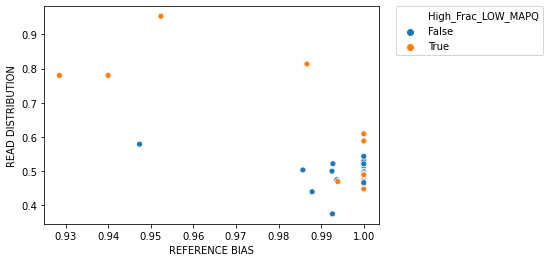

In [13]:
print("after 2nd filter", len(list(sp2['REFERENCE BIAS'])))
sp2['High_Frac_LOW_MAPQ'] = sp2['FRAC_LOW_MAPQ']>0

ax = sns.scatterplot(x="REFERENCE BIAS", y="READ DISTRIBUTION",  hue = "High_Frac_LOW_MAPQ", data = sp2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
sp2

,REFERENCE BIAS,HET_SITE,READ DISTRIBUTION,FRAC_LOW_MAPQ,Ambiguity,MapQ,High_Frac_LOW_MAPQ
0,1.000000,7947693,0.588235,0.257353,2,29.147059,True
1,0.928571,7947814,0.780000,0.120000,1,35.220000,True
2,0.940000,7947815,0.780000,0.120000,1,35.220000,True
3,1.000000,7947926,0.448276,0.310345,2,24.724138,True
7,1.000000,10397564,0.500000,0.006098,1,39.682927,True
8,1.000000,10397565,0.491018,0.005988,1,39.604790,True
19,1.000000,14263400,0.496503,0.000000,0,41.538462,False
21,1.000000,14329492,0.539474,0.000000,1,39.677632,False
22,0.992754,14345163,0.521739,0.000000,0,41.318841,False
31,1.000000,15625692,0.522293,0.000000,1,39.477707,False
